In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import sys
sys.path.append("/n/home12/binxuwang/Github/GAN-Geometry")
from core import get_full_hessian, hessian_compute, save_imgrid, show_imgrid, plot_spectra

https://github.com/noahgolmant/pytorch-hessian-eigenthings

https://github.com/Animadversio/Visual_Neuro_InSilico_Exp/blob/master/Hessian/Diff_ImDist_Hess_cmp.py

In [4]:
import os
import torch 
import numpy as np
import pandas as pd
import pickle as pkl
from os.path import join
import matplotlib.pylab as plt
import seaborn as sns
from tqdm.auto import trange, tqdm
# from core import get_full_hessian, hessian_compute, save_imgrid, show_imgrid, plot_spectra
from circuit_toolkit.GAN_utils import BigGAN_wrapper, loadBigGAN, upconvGAN
from circuit_toolkit.plot_utils import saveallforms
from pytorch_pretrained_biggan import BigGAN


### Synopsis of BigGAN and upconvGAN

In [5]:
save_root = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Hessian"
FC6_dir = join(save_root, "DeePSim_FC6")
BigGAN_dir = join(save_root, "BigGAN")
syndir = join(save_root, "synopsis")
os.makedirs(syndir, exist_ok=True)

In [13]:
eigval_col = []
for rnd in trange(1000):
    pkl_file = join(FC6_dir, f"Hessian_MSE_rnd{rnd}.pkl")
    with open(pkl_file, 'rb') as file:
        data = pkl.load(file)
    eigvals_MSE = data["eigvals_MSE"]
    eigval_col.append(eigvals_MSE)
DP_eigval_arr = np.array(eigval_col)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [12]:
eigval_col = []
for cls_id in trange(1000):
    for rnd in range(1):
        pkl_file = join(BigGAN_dir, f"Hessian_MSE_cls{cls_id}_rnd{rnd}.pkl")
        with open(pkl_file, 'rb') as file:
            data = pkl.load(file)
        eigvals_MSE = data["eigvals_MSE"]
        eigval_col.append(eigvals_MSE)
BigGAN_eigval_arr = np.array(eigval_col)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [17]:
np.save(join(syndir, "DeePSim_FC6_eigval_arr.npy"), DP_eigval_arr)
np.save(join(syndir, "BigGAN_eigval_arr.npy"), BigGAN_eigval_arr)

In [9]:
!ls {FC6_dir}

Hessian_MSE_rnd0.pkl	Hessian_MSE_rnd400.pkl	Hessian_MSE_rnd701.pkl
Hessian_MSE_rnd100.pkl	Hessian_MSE_rnd401.pkl	Hessian_MSE_rnd702.pkl
Hessian_MSE_rnd101.pkl	Hessian_MSE_rnd402.pkl	Hessian_MSE_rnd703.pkl
Hessian_MSE_rnd102.pkl	Hessian_MSE_rnd403.pkl	Hessian_MSE_rnd704.pkl
Hessian_MSE_rnd103.pkl	Hessian_MSE_rnd404.pkl	Hessian_MSE_rnd705.pkl
Hessian_MSE_rnd104.pkl	Hessian_MSE_rnd405.pkl	Hessian_MSE_rnd706.pkl
Hessian_MSE_rnd105.pkl	Hessian_MSE_rnd406.pkl	Hessian_MSE_rnd707.pkl
Hessian_MSE_rnd106.pkl	Hessian_MSE_rnd407.pkl	Hessian_MSE_rnd708.pkl
Hessian_MSE_rnd107.pkl	Hessian_MSE_rnd408.pkl	Hessian_MSE_rnd709.pkl
Hessian_MSE_rnd108.pkl	Hessian_MSE_rnd409.pkl	Hessian_MSE_rnd70.pkl
Hessian_MSE_rnd109.pkl	Hessian_MSE_rnd40.pkl	Hessian_MSE_rnd710.pkl
Hessian_MSE_rnd10.pkl	Hessian_MSE_rnd410.pkl	Hessian_MSE_rnd711.pkl
Hessian_MSE_rnd110.pkl	Hessian_MSE_rnd411.pkl	Hessian_MSE_rnd712.pkl
Hessian_MSE_rnd111.pkl	Hessian_MSE_rnd412.pkl	Hessian_MSE_rnd713.pkl
Hessian_MSE_rnd112.pkl	Hessian_MSE_rnd4

### Plot the spectrum 

In [23]:
figdir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Hessian/synopsis"
os.makedirs(figdir, exist_ok=True)

In [5]:
syndir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Hessian/synopsis"
DP_eigval_arr = np.load(join(syndir, "DeePSim_FC6_eigval_arr.npy"))
BigGAN_eigval_arr = np.load(join(syndir, "BigGAN_eigval_arr.npy"))

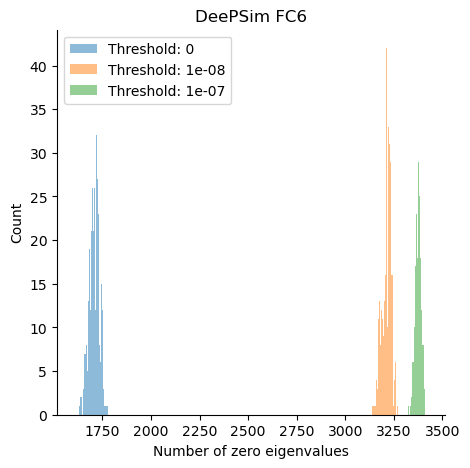

In [7]:
plt.figure(figsize=(5, 5))
for thresh in [0, 1E-8, 1E-7, ]:
    zero_eigval_count = (DP_eigval_arr < thresh).sum(axis=1)
    plt.hist(zero_eigval_count, bins=100, alpha=0.5, label=f"Threshold: {thresh}", density=False)
plt.legend()
plt.title("DeePSim FC6")
plt.xlabel("Number of zero eigenvalues")
plt.ylabel("Count")
saveallforms(figdir, "DeePSim_FC6_zero_eigval_count", plt.gcf(), )
plt.show()

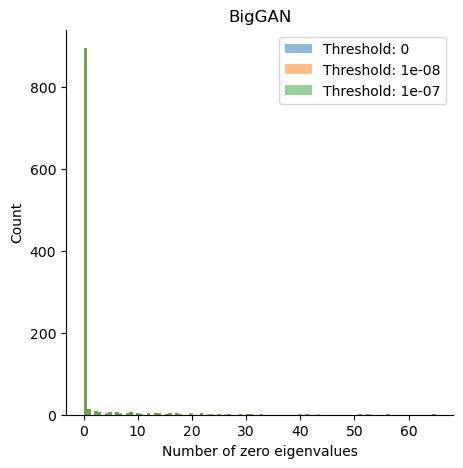

In [8]:
plt.figure(figsize=(5, 5))
for thresh in [0, 1E-8, 1E-7, ]:
    zero_eigval_count = (BigGAN_eigval_arr < thresh).sum(axis=1)
    plt.hist(zero_eigval_count, bins=100, alpha=0.5, label=f"Threshold: {thresh}")
plt.legend()
plt.title("BigGAN")
plt.xlabel("Number of zero eigenvalues")
plt.ylabel("Count")
saveallforms(figdir, "BigGAN_zero_eigval_count", plt.gcf(), )
plt.show()

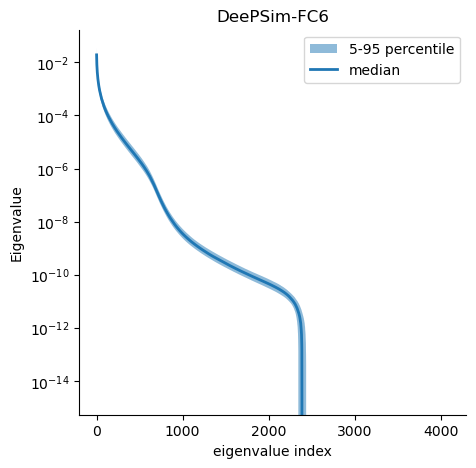

In [9]:
# plot the 5-95 percentile of the eigenvalues as shaded area, and 50 percentile of the eigenvalues as a line
prct_5, prct_50, prct_95 = np.percentile(DP_eigval_arr[:, ::-1], [5, 50, 95], axis=0)

plt.figure(figsize=(5, 5))
plt.fill_between(np.arange(prct_5.shape[0]), prct_5, prct_95, alpha=0.5, label="5-95 percentile")
plt.plot(np.arange(prct_50.shape[0]), prct_50, label="median", lw=2)
plt.yscale("log")
plt.legend()
plt.title("DeePSim-FC6")
plt.ylabel("Eigenvalue")
plt.xlabel("eigenvalue index")
saveallforms(figdir, "DeePSim_FC6_eigval_5-95_median", plt.gcf(), )
plt.show()

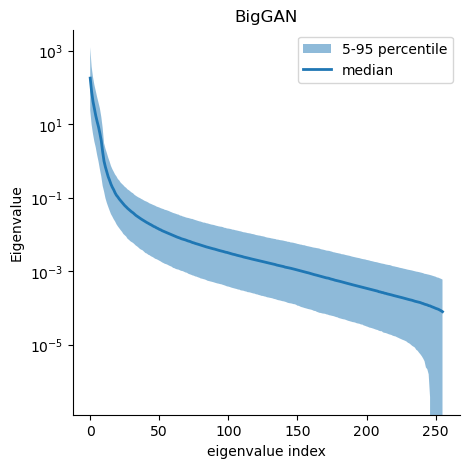

In [10]:
# plot the 5-95 percentile of the eigenvalues as shaded area, and 50 percentile of the eigenvalues as a line
prct_5, prct_50, prct_95 = np.percentile(BigGAN_eigval_arr[:, ::-1], [5, 50, 95], axis=0)    
plt.figure(figsize=(5, 5))
plt.fill_between(np.arange(prct_5.shape[0]), prct_5, prct_95, alpha=0.5, label="5-95 percentile")
plt.plot(np.arange(prct_50.shape[0]), prct_50, label="median", lw=2)
plt.yscale("log")
plt.legend()
plt.title("BigGAN")
plt.ylabel("Eigenvalue")
plt.xlabel("eigenvalue index")
saveallforms(figdir, "BigGAN_eigval_5-95_median", plt.gcf(), )
plt.show()

### Statistical summary

In [16]:
for thresh in [0, 1E-8, 1E-7, ]:
    zero_eigval_count = (DP_eigval_arr < thresh).sum(axis=1)
    print(f"Threshold: {thresh} : 0 eigenval counts median {np.median(zero_eigval_count):.1f} mean+-std {np.mean(zero_eigval_count):.1f}+-{np.std(zero_eigval_count):.1f} | full rank Hessian {np.sum(zero_eigval_count == 0)}/{zero_eigval_count.shape[0]}")

Threshold: 0 : 0 eigenval counts median 1708.5 mean+-std 1706.7+-27.2 | full rank Hessian 0/1000
Threshold: 1e-08 : 0 eigenval counts median 3210.5 mean+-std 3209.5+-23.9 | full rank Hessian 0/1000
Threshold: 1e-07 : 0 eigenval counts median 3376.0 mean+-std 3375.9+-15.8 | full rank Hessian 0/1000


In [22]:
for thresh in [0, 1E-8, 1E-7, ]:
    zero_eigval_count = (BigGAN_eigval_arr < thresh).sum(axis=1)
    zero_eigval_count_nonfullrank = zero_eigval_count[zero_eigval_count > 0]
    print(f"Threshold: {thresh} : 0 eigenval counts median {np.median(zero_eigval_count):.1f} mean+-std {np.mean(zero_eigval_count):.1f}+-{np.std(zero_eigval_count):.1f} | full rank Hessian {np.sum(zero_eigval_count == 0)}/{zero_eigval_count.shape[0]}")
    print(f"Threshold: {thresh} [only non-full rank] : 0 eigenval counts median {np.median(zero_eigval_count_nonfullrank):.1f} mean+-std {np.mean(zero_eigval_count_nonfullrank):.1f}+-{np.std(zero_eigval_count_nonfullrank):.1f}  [5,95] percentile {np.percentile(zero_eigval_count_nonfullrank, [5, 95])}")

Threshold: 0 : 0 eigenval counts median 0.0 mean+-std 1.3+-5.6 | full rank Hessian 895/1000
Threshold: 0 [only non-full rank] : 0 eigenval counts median 9.0 mean+-std 12.6+-12.7  [5,95] percentile [ 1.  38.6]
Threshold: 1e-08 : 0 eigenval counts median 0.0 mean+-std 1.3+-5.6 | full rank Hessian 895/1000
Threshold: 1e-08 [only non-full rank] : 0 eigenval counts median 9.0 mean+-std 12.6+-12.7  [5,95] percentile [ 1.  38.6]
Threshold: 1e-07 : 0 eigenval counts median 0.0 mean+-std 1.3+-5.7 | full rank Hessian 894/1000
Threshold: 1e-07 [only non-full rank] : 0 eigenval counts median 9.0 mean+-std 12.6+-12.8  [5,95] percentile [ 1. 39.]


### Projected Hessian and their spectrum

#### DeePSim FC6

In [6]:
import torch as th

In [7]:
H_col = []
for rnd in trange(1000):
    pkl_file = join(FC6_dir, f"Hessian_MSE_rnd{rnd}.pkl")
    with open(pkl_file, 'rb') as file:
        data = pkl.load(file)
    H_MSE = data["H_MSE"]
    H_col.append(th.from_numpy(H_MSE))
DP_hessian_arr = th.stack(H_col, dim=0)
DP_hessian_avg = DP_hessian_arr.mean(dim=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

In [8]:
del H_col

In [12]:
DP_hessian_avg_symm = (DP_hessian_avg + DP_hessian_avg.T) / 2
DP_avg_eigval, DP_avg_eigvec = th.linalg.eigh(DP_hessian_avg_symm.cuda())
DP_avg_eigval = DP_avg_eigval.cpu()
DP_avg_eigvec = DP_avg_eigvec.cpu()

In [13]:
np.savez(join(FC6_dir, "DeePSim_FC6_avg_hessian.npz"), 
         eigval=DP_avg_eigval.cpu().numpy(), eigvec=DP_avg_eigvec.cpu().numpy(), H_avg=DP_hessian_avg.cpu().numpy())

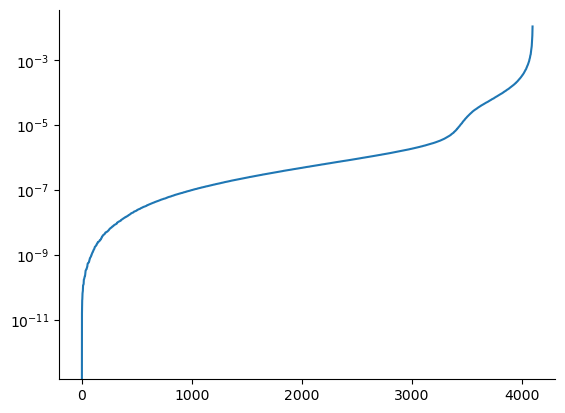

Number of zero eigenvalues: 324


In [14]:
plt.plot(DP_avg_eigval)
plt.yscale("log")
plt.show()
# compute the number of zero eigenvalues
zero_eigval_count = (DP_avg_eigval < 1E-8).sum()
print(f"Number of zero eigenvalues: {zero_eigval_count}")

In [ ]:
DP_avg_eigval[-500:]

In [16]:
import torch as th
from tqdm import tqdm, trange

In [17]:
batch = 64
top_eigvecs_th = DP_avg_eigvec[:, -500:].to("cuda")
projected_hessian_arr_th = th.zeros(DP_hessian_arr.shape[0], top_eigvecs_th.shape[1], top_eigvecs_th.shape[1])
projected_eigval_arr_th = th.zeros(DP_hessian_arr.shape[0], top_eigvecs_th.shape[1])
for csr in trange(0, DP_hessian_arr.shape[0], batch): # 32 sec for 1000 matrices using cuda. 
    projected_hessian_part_th = th.einsum('Bjk,kl,jm->Bml', DP_hessian_arr[csr:csr+batch].to("cuda"), top_eigvecs_th, top_eigvecs_th)
    # symmetrize
    projected_hessian_part_th = (projected_hessian_part_th + projected_hessian_part_th.transpose(1, 2)) / 2
    projected_eigval_part_th = th.linalg.eigvalsh(projected_hessian_part_th, UPLO='U')
    projected_hessian_arr_th[csr:csr+batch] = projected_hessian_part_th.cpu()
    projected_eigval_arr_th[csr:csr+batch] = projected_eigval_part_th.cpu()
    

100%|██████████| 16/16 [00:32<00:00,  2.02s/it]


In [21]:
np.savez(join(FC6_dir, "projected_hessian_collection_eigen.npz"), 
         eigval_collection=projected_eigval_arr_th.cpu().numpy(), H_collection=projected_hessian_arr_th.cpu().numpy())

In [20]:
for thresh in [0, 1E-8, 1E-7, ]:
    zero_eigval_count = (projected_eigval_arr_th < thresh).sum(dim=1).numpy()
    print(f"Threshold: {thresh} : 0 eigenval counts median {np.median(zero_eigval_count):.1f} mean+-std {np.mean(zero_eigval_count):.1f}+-{np.std(zero_eigval_count):.1f} | full rank Hessian {np.sum(zero_eigval_count == 0)}/{zero_eigval_count.shape[0]}")


Threshold: 0 : 0 eigenval counts median 0.0 mean+-std 0.0+-0.0 | full rank Hessian 1000/1000
Threshold: 1e-08 : 0 eigenval counts median 0.0 mean+-std 0.0+-0.0 | full rank Hessian 1000/1000
Threshold: 1e-07 : 0 eigenval counts median 0.0 mean+-std 0.0+-0.0 | full rank Hessian 1000/1000


In [52]:
projected_eigval_arr_th = th.from_numpy(np.load(join(FC6_dir, "projected_hessian_collection_eigen.npz"))["eigval_collection"])

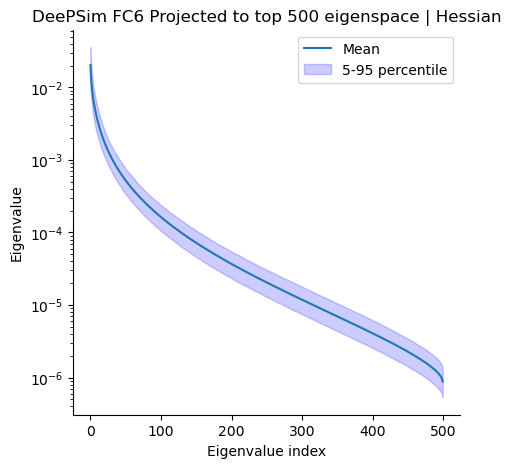

In [54]:
projected_eigval_arr_reversed = projected_eigval_arr_th.flip(dims=[1]).cpu()
mean_eigval = projected_eigval_arr_reversed.mean(dim=0)
percentile_5 = th.quantile(projected_eigval_arr_reversed, 0.05, dim=0)
percentile_95 = th.quantile(projected_eigval_arr_reversed, 0.95, dim=0)

plt.figure(figsize=(5, 5))
plt.plot(mean_eigval, label='Mean')
plt.fill_between(range(len(mean_eigval)), percentile_5, percentile_95, color='b', alpha=0.2, label='5-95 percentile')
plt.yscale("log")
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue")
plt.title("DeePSim FC6 Projected to top 500 eigenspace | Hessian")
plt.legend()
saveallforms(figdir, "DeePSim_FC6_projected_eigval_5-95_median", plt.gcf(), )
plt.show()

#### BigGAN

In [26]:
eigval_col = []
for cls_id in trange(1000):
    for rnd in range(1):
        pkl_file = join(BigGAN_dir, f"Hessian_MSE_cls{cls_id}_rnd{rnd}.pkl")
        with open(pkl_file, 'rb') as file:
            data = pkl.load(file)
        H_MSE = data["H_MSE"]
        eigval_col.append(th.from_numpy(H_MSE))
BigGAN_eigval_arr = th.stack(eigval_col, dim=0)
BigGAN_eigval_arr_avg = BigGAN_eigval_arr.mean(dim=0)
del eigval_col
BigGAN_eigval_arr_avg_symm = (BigGAN_eigval_arr_avg + BigGAN_eigval_arr_avg.T) / 2
BigGAN_avg_eigval, BigGAN_avg_eigvec = th.linalg.eigh(BigGAN_eigval_arr_avg_symm.cuda())
BigGAN_avg_eigval = BigGAN_avg_eigval.cpu()
BigGAN_avg_eigvec = BigGAN_avg_eigvec.cpu()

100%|██████████| 1000/1000 [00:27<00:00, 36.46it/s]


In [ ]:
import torch as th
from tqdm import tqdm, trange

In [44]:
batch = 128
top_eigvecs_th = BigGAN_avg_eigvec[:, -128:].to("cuda")
projected_hessian_arr_th = th.zeros(BigGAN_eigval_arr.shape[0], top_eigvecs_th.shape[1], top_eigvecs_th.shape[1])
projected_eigval_arr_th = th.zeros(BigGAN_eigval_arr.shape[0], top_eigvecs_th.shape[1])
for csr in trange(0, BigGAN_eigval_arr.shape[0], batch): # 32 sec for 1000 matrices using cuda. 
    projected_hessian_part_th = th.einsum('Bjk,kl,jm->Bml', BigGAN_eigval_arr[csr:csr+batch].to("cuda"), top_eigvecs_th, top_eigvecs_th)
    # symmetrize
    projected_hessian_part_th = (projected_hessian_part_th + projected_hessian_part_th.transpose(1, 2)) / 2
    projected_eigval_part_th = th.linalg.eigvalsh(projected_hessian_part_th, UPLO='U')
    projected_hessian_arr_th[csr:csr+batch] = projected_hessian_part_th.cpu()
    projected_eigval_arr_th[csr:csr+batch] = projected_eigval_part_th.cpu()
    
np.savez(join(BigGAN_dir, "projected_hessian_collection_eigen.npz"), 
         eigval_collection=projected_eigval_arr_th.cpu().numpy(), H_collection=projected_hessian_arr_th.cpu().numpy())

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:02<00:00,  3.66it/s]


In [46]:
for thresh in [0, 1E-8, 1E-7, ]:
    zero_eigval_count = (projected_eigval_arr_th < thresh).sum(dim=1).numpy()
    zero_eigval_count_nonfullrank = zero_eigval_count[zero_eigval_count > 0]
    print(f"Threshold: {thresh} : 0 eigenval counts median {np.median(zero_eigval_count):.1f} mean+-std {np.mean(zero_eigval_count):.1f}+-{np.std(zero_eigval_count):.1f} | full rank Hessian {np.sum(zero_eigval_count == 0)}/{zero_eigval_count.shape[0]}")
    print(f"Threshold: {thresh} [only non-full rank] : 0 eigenval counts median {np.median(zero_eigval_count_nonfullrank):.1f} mean+-std {np.mean(zero_eigval_count_nonfullrank):.1f}+-{np.std(zero_eigval_count_nonfullrank):.1f}  [5,95] percentile {np.percentile(zero_eigval_count_nonfullrank, [5, 95])}")

Threshold: 0 : 0 eigenval counts median 0.0 mean+-std 0.1+-0.8 | full rank Hessian 988/1000
Threshold: 0 [only non-full rank] : 0 eigenval counts median 3.0 mean+-std 5.3+-5.6  [5,95] percentile [ 1.   16.25]
Threshold: 1e-08 : 0 eigenval counts median 0.0 mean+-std 0.1+-0.8 | full rank Hessian 988/1000
Threshold: 1e-08 [only non-full rank] : 0 eigenval counts median 3.5 mean+-std 5.4+-5.6  [5,95] percentile [ 1.   16.25]
Threshold: 1e-07 : 0 eigenval counts median 0.0 mean+-std 0.1+-0.8 | full rank Hessian 988/1000
Threshold: 1e-07 [only non-full rank] : 0 eigenval counts median 3.5 mean+-std 5.4+-5.6  [5,95] percentile [ 1.   16.25]


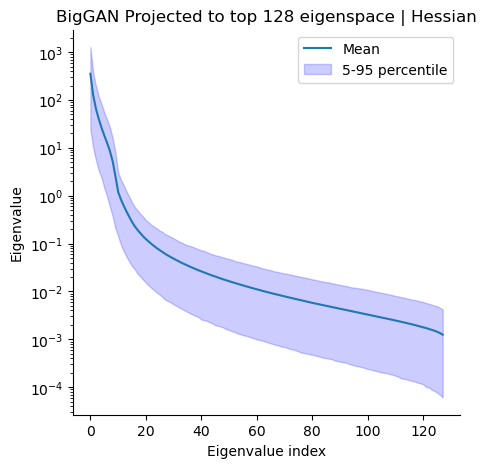

In [51]:
projected_eigval_arr_reversed = projected_eigval_arr_th.flip(dims=[1]).cpu()
mean_eigval = projected_eigval_arr_reversed.mean(dim=0)
percentile_5 = th.quantile(projected_eigval_arr_reversed, 0.05, dim=0)
percentile_95 = th.quantile(projected_eigval_arr_reversed, 0.95, dim=0)

plt.figure(figsize=(5, 5))
plt.plot(mean_eigval, label='Mean')
plt.fill_between(range(len(mean_eigval)), percentile_5, percentile_95, color='b', alpha=0.2, label='5-95 percentile')
plt.yscale("log")
plt.xlabel("Eigenvalue index")
plt.ylabel("Eigenvalue")
plt.title("BigGAN Projected to top 128 eigenspace | Hessian")
plt.legend()
saveallforms(figdir, "BigGAN_projected_eigval_5-95_median", plt.gcf(), )
plt.show()

### Visulize the null space

### Load the image dissimilarity matrices

In [8]:
import lpips
import pytorch_msssim
D = pytorch_msssim.SSIM()  # note SSIM, higher the score the more similar they are. So to confirm to the distance convention, we use 1 - SSIM as a proxy to distance.

def SSIM_Dist(im1, im2):
    return 1 - D(im1, im2)

# L2 / MSE
def MSE(im1, im2):
    return (im1 - im2).pow(2).mean(dim=[1,2,3])

ImDist = lpips.LPIPS(net="squeeze").cuda()

Setting up [LPIPS] perceptual loss: trunk [squeeze], v[0.1], spatial [off]
Loading model from: /n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/lpips/weights/v0.1/squeeze.pth


/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/n/home12/binxuwang/.conda/envs/torch2/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=SqueezeNet1_1_Weights.IMAGENET1K_V1`. You can also use `weights=SqueezeNet1_1_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


### BigGAN

In [ ]:
BGAN = loadBigGAN()  # Default to be "biggan-deep-256"
BGAN.cuda().eval()
BGAN.requires_grad_(False)
G = BigGAN_wrapper(BGAN)

In [32]:
BGAN = BigGAN.from_pretrained("biggan-deep-256")
BGAN.cuda().eval()
BGAN.requires_grad_(False)
G = BigGAN_wrapper(BGAN)

In [ ]:
feat = G.sample_vector(device="cuda", class_id=145) # class King Penguin

torch.Size([1, 3, 256, 256])


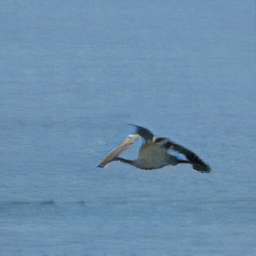

In [ ]:
feat = G.sample_vector(device="cuda", class_id=144)
imgs = G.visualize(feat)
print(imgs.shape)
show_imgrid(imgs)

In [10]:
# refvec = G.sample_vector(1, device="cuda")
refvec = G.sample_vector(device="cuda", class_id=143)
eigvals_PS, eigvects_PS, H_PS = hessian_compute(G, refvec, ImDist, hessian_method="BP", symmetrize=True)
eigvals_SSIM, eigvects_SSIM, H_SSIM = hessian_compute(G, refvec, SSIM_Dist, hessian_method="BP", symmetrize=True)
eigvals_MSE, eigvects_MSE, H_MSE = hessian_compute(G, refvec, MSE, hessian_method="BP", symmetrize=True)

 [================================================================>]  Step: 76ms | Tot: 19s415ms | full hessian columns: 255 of 2 256/256 
Hessian computed with BP in 19.55 sec


### Mass compute

In [33]:
refvec = G.sample_vector(device="cuda", class_id=143, seed=10)
eigvals_MSE, eigvects_MSE, H_MSE = hessian_compute(G, refvec, MSE, hessian_method="BP", symmetrize=True) # 19.6 sec

 [================================================================>]  Step: 76ms | Tot: 19s428ms | full hessian columns: 255 of 2 256/256 
Hessian computed with BP in 19.56 sec


In [29]:
20 * 1000 / 3600

5.555555555555555

In [36]:
savedir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Hessian/BigGAN"

In [37]:
!ls /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Hessian/BigGAN

Hessian_MSE_cls0_rnd0.pkl   Hessian_MSE_cls27_rnd0.pkl
Hessian_MSE_cls10_rnd0.pkl  Hessian_MSE_cls28_rnd0.pkl
Hessian_MSE_cls11_rnd0.pkl  Hessian_MSE_cls29_rnd0.pkl
Hessian_MSE_cls12_rnd0.pkl  Hessian_MSE_cls2_rnd0.pkl
Hessian_MSE_cls13_rnd0.pkl  Hessian_MSE_cls30_rnd0.pkl
Hessian_MSE_cls14_rnd0.pkl  Hessian_MSE_cls31_rnd0.pkl
Hessian_MSE_cls15_rnd0.pkl  Hessian_MSE_cls32_rnd0.pkl
Hessian_MSE_cls16_rnd0.pkl  Hessian_MSE_cls33_rnd0.pkl
Hessian_MSE_cls17_rnd0.pkl  Hessian_MSE_cls34_rnd0.pkl
Hessian_MSE_cls18_rnd0.pkl  Hessian_MSE_cls35_rnd0.pkl
Hessian_MSE_cls19_rnd0.pkl  Hessian_MSE_cls36_rnd0.pkl
Hessian_MSE_cls1_rnd0.pkl   Hessian_MSE_cls3_rnd0.pkl
Hessian_MSE_cls20_rnd0.pkl  Hessian_MSE_cls4_rnd0.pkl
Hessian_MSE_cls21_rnd0.pkl  Hessian_MSE_cls5_rnd0.pkl
Hessian_MSE_cls22_rnd0.pkl  Hessian_MSE_cls6_rnd0.pkl
Hessian_MSE_cls23_rnd0.pkl  Hessian_MSE_cls7_rnd0.pkl
Hessian_MSE_cls24_rnd0.pkl  Hessian_MSE_cls8_rnd0.pkl
Hessian_MSE_cls25_rnd0.pkl  Hessian_MSE_cls9_rnd0.pkl
Hessian_MSE_cls26_

In [ ]:
savedir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Hessian/BigGAN"
for class_id in trange(1000):
    for seed in range(1):
        # refvec = G.sample_vector(1, device="cuda")
        refvec = G.sample_vector(device="cuda", class_id=class_id, seed=seed)
        eigvals_MSE, eigvects_MSE, H_MSE = hessian_compute(G, refvec, MSE, hessian_method="BP", symmetrize=True)
        print("num of small eigvals: ", np.sum(eigvals_MSE < 1E-8))
        pkl.dump({"eigvals_MSE": eigvals_MSE, "eigvects_MSE": eigvects_MSE, "H_MSE": H_MSE, "vector": refvec, "class_id": class_id, "seed": seed}, 
                 open(join(savedir, f"Hessian_MSE_cls{class_id}_rnd{seed}.pkl"), "wb"))
        # eigvals_PS, eigvects_PS, H_PS = hessian_compute(G, refvec, ImDist, hessian_method="BP", symmetrize=True)
        # eigvals_SSIM, eigvects_SSIM, H_SSIM = hessian_compute(G, refvec, SSIM_Dist, hessian_method="BP", symmetrize=True)

### Analysis

In [ ]:
from scipy.stats import pearsonr

In [12]:
eigvals_PS

array([2.91729998e-03, 2.99217878e-03, 3.12963710e-03, 3.35088116e-03,
       3.46733746e-03, 3.54728801e-03, 3.78877390e-03, 3.86047852e-03,
       3.89308366e-03, 3.95923574e-03, 4.06795600e-03, 4.21458855e-03,
       4.47789533e-03, 4.52308962e-03, 4.63672914e-03, 4.95616253e-03,
       5.13605308e-03, 5.20803733e-03, 5.31726563e-03, 5.46077453e-03,
       5.57166152e-03, 5.71552012e-03, 5.82194934e-03, 5.97385457e-03,
       6.19363552e-03, 6.32582791e-03, 6.41656388e-03, 6.63725473e-03,
       6.77425973e-03, 6.90491823e-03, 7.14091212e-03, 7.22726388e-03,
       7.34153995e-03, 7.54528260e-03, 7.70357531e-03, 8.12050328e-03,
       8.15614220e-03, 8.38438980e-03, 8.57759546e-03, 8.71085096e-03,
       8.93556140e-03, 9.15700011e-03, 9.47102904e-03, 9.53906868e-03,
       9.83534660e-03, 1.02644125e-02, 1.03559624e-02, 1.06067611e-02,
       1.08472109e-02, 1.10252844e-02, 1.12963626e-02, 1.15071712e-02,
       1.19415941e-02, 1.21356742e-02, 1.24636181e-02, 1.27812484e-02,
      

In [13]:
eigvals_MSE

array([1.86674617e-04, 1.90748848e-04, 1.94379507e-04, 1.97230489e-04,
       2.07429242e-04, 2.16243934e-04, 2.21565846e-04, 2.35778803e-04,
       2.43157716e-04, 2.50167592e-04, 2.53583770e-04, 2.55899067e-04,
       2.69169308e-04, 2.75065890e-04, 2.80294364e-04, 2.82143359e-04,
       2.91409786e-04, 2.95835722e-04, 3.07019043e-04, 3.09794501e-04,
       3.25404922e-04, 3.31251766e-04, 3.38980637e-04, 3.40347877e-04,
       3.46725661e-04, 3.54782911e-04, 3.66049178e-04, 3.77773074e-04,
       3.80853249e-04, 3.88561253e-04, 3.91835230e-04, 4.03993996e-04,
       4.06925625e-04, 4.21592995e-04, 4.34629066e-04, 4.46709455e-04,
       4.54404799e-04, 4.64186567e-04, 4.79266688e-04, 4.85942757e-04,
       4.92534076e-04, 5.01450384e-04, 5.24034258e-04, 5.31293335e-04,
       5.43522357e-04, 5.52798738e-04, 5.69810334e-04, 5.79157844e-04,
       5.91669930e-04, 6.12718635e-04, 6.18671009e-04, 6.28338836e-04,
       6.47776760e-04, 6.65810949e-04, 6.77464879e-04, 6.86845277e-04,
      

In [18]:
# Compute correlation between the two Hessian matrices
H_MSE_flat = H_MSE.flatten()
H_PS_flat = H_PS.flatten()
correlation, p_value = pearsonr(H_MSE_flat, H_PS_flat)
print(f"Correlation between MSE and Perceptual Similarity Hessians: {correlation:.4f}")
correlation

Correlation between MSE and Perceptual Similarity Hessians: 0.9813


0.9812555299741924

In [24]:
from scipy.stats import pearsonr
# Compute correlation between the two Hessian matrices
H_SSIM_flat = H_SSIM.flatten()
H_PS_flat = H_PS.flatten()
correlation, p_value = pearsonr(H_SSIM_flat, H_PS_flat)
print(f"Correlation between SSIM and Perceptual Similarity Hessians: {correlation:.4f}")
correlation

Correlation between SSIM and Perceptual Similarity Hessians: -0.8539


-0.8539239319438379

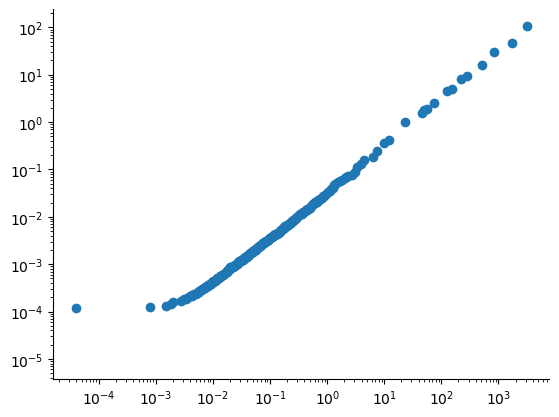

In [15]:
plt.scatter(eigvals_PS, eigvals_MSE)
plt.xscale("log")
plt.yscale("log")
plt.show()

In [12]:
eigvals_PS

array([-6.34676889e-02, -2.46018227e-02, -1.94525905e-02, -1.56979077e-02,
       -8.03201459e-03, -6.96268259e-03, -4.73657669e-03, -4.49605752e-03,
       -3.04926164e-03, -1.08688197e-03, -4.24631289e-05,  3.93085138e-05,
        7.72257510e-04,  1.50342798e-03,  1.86099694e-03,  2.02711811e-03,
        2.71407957e-03,  3.10687022e-03,  3.33688851e-03,  3.51226749e-03,
        3.92383663e-03,  4.25328081e-03,  4.32982994e-03,  4.69102105e-03,
        4.99399053e-03,  5.24820294e-03,  5.52423857e-03,  5.56091871e-03,
        5.74719394e-03,  6.08099811e-03,  6.24876935e-03,  6.48480887e-03,
        6.72942959e-03,  6.83608092e-03,  7.34205078e-03,  7.36225070e-03,
        7.68718682e-03,  7.93462060e-03,  8.15083366e-03,  8.32121726e-03,
        8.42005108e-03,  8.85618664e-03,  9.02014039e-03,  9.31666978e-03,
        9.43628047e-03,  9.90871619e-03,  9.96161625e-03,  1.05974199e-02,
        1.07256509e-02,  1.08574089e-02,  1.10711725e-02,  1.14148976e-02,
        1.15240011e-02,  

In [13]:
eigvals_MSE

array([-2.88019469e-03, -8.58492509e-04, -5.14867366e-04, -4.17393458e-04,
       -1.09075590e-04, -8.29227429e-05, -1.63598543e-05,  8.66158643e-06,
        3.65539563e-05,  4.37540875e-05,  7.27565275e-05,  1.16227544e-04,
        1.26698666e-04,  1.32945512e-04,  1.45970000e-04,  1.55874004e-04,
        1.68322877e-04,  1.81238036e-04,  1.87339363e-04,  1.92588326e-04,
        2.11589591e-04,  2.14393789e-04,  2.23800118e-04,  2.39966859e-04,
        2.40548266e-04,  2.51880294e-04,  2.59141758e-04,  2.64299801e-04,
        2.72633391e-04,  2.81799876e-04,  2.89482647e-04,  2.94064783e-04,
        3.01371823e-04,  3.15555139e-04,  3.18331819e-04,  3.32885742e-04,
        3.39345512e-04,  3.43299587e-04,  3.52448173e-04,  3.64266656e-04,
        3.69845744e-04,  3.75464821e-04,  3.78997385e-04,  3.88267508e-04,
        4.14054142e-04,  4.23408957e-04,  4.34483722e-04,  4.36892267e-04,
        4.44437115e-04,  4.45495505e-04,  4.55529342e-04,  4.70429892e-04,
        4.88272548e-04,  

### Scratch zone

In [30]:
feat = G.sample_vector(device="cuda", class_id=143)
feat_prime = feat.clone()
feat_prime.requires_grad_(True)
with torch.no_grad():
    img_ref = G.visualize(feat_prime)
imgs_prime = G.visualize(feat_prime)
d2 = (img_ref - imgs_prime).pow(2).flatten(start_dim=1).mean()
d2.backward(retain_graph=True, create_graph=True)
assert torch.allclose(d2, torch.tensor(0.0), atol=1e-6), "d2 is not small enough"
z_grad = feat_prime.grad
print(z_grad.shape)
assert torch.allclose(z_grad, torch.zeros_like(z_grad), atol=1e-6), "z_grad is not the correct shape"
# compute the Hessian column by column
H_col = []
for i in trange(z_grad.shape[1]):
    z_grad[0, i].backward(retain_graph=True, )
    z_grad_i = feat_prime.grad
    H_col.append(z_grad_i)
H_mat = torch.stack(H_col, dim=1)
print(H_mat.shape)

torch.Size([1, 256])


  0%|          | 0/256 [00:00<?, ?it/s]

torch.Size([1, 256, 256])


In [31]:
with torch.no_grad():
    H_mat = torch.stack(H_col, dim=-1)
    evals, evecs = torch.linalg.eigh(H_mat[0])
    evals, evecs

In [32]:
evals

tensor([-4.0966e+02, -1.1819e+02, -6.9653e+01, -4.7945e+01, -3.7566e+01,
        -2.9402e+01, -2.6332e+01, -2.3635e+01, -2.0166e+01, -1.9031e+01,
        -1.6708e+01, -1.4351e+01, -1.3679e+01, -1.2567e+01, -1.1422e+01,
        -1.1381e+01, -1.0633e+01, -9.9853e+00, -9.8744e+00, -9.4369e+00,
        -9.3333e+00, -8.7099e+00, -7.9132e+00, -7.8499e+00, -7.2485e+00,
        -7.1943e+00, -6.5014e+00, -6.4384e+00, -6.0151e+00, -5.4768e+00,
        -5.1647e+00, -5.0153e+00, -4.9296e+00, -4.6651e+00, -4.5027e+00,
        -4.3992e+00, -4.3856e+00, -4.2607e+00, -4.1548e+00, -3.9184e+00,
        -3.8436e+00, -3.4967e+00, -3.3381e+00, -3.1569e+00, -3.0972e+00,
        -3.0437e+00, -2.9414e+00, -2.8676e+00, -2.8021e+00, -2.7001e+00,
        -2.5671e+00, -2.3787e+00, -2.3396e+00, -2.2363e+00, -2.1067e+00,
        -2.0674e+00, -2.0519e+00, -2.0074e+00, -1.9303e+00, -1.9177e+00,
        -1.8893e+00, -1.8214e+00, -1.7585e+00, -1.5829e+00, -1.5672e+00,
        -1.4984e+00, -1.4719e+00, -1.4249e+00, -1.3

In [ ]:
z_grad_i

tensor([[-1.1272e+00,  1.0686e-01, -6.5884e-01, -1.0657e+00,  5.2977e-01,
         -1.9850e+00, -5.3544e-02, -3.1396e-01, -7.0110e-01, -6.3838e-02,
          7.9838e-01,  2.0871e-01,  1.1594e+00,  8.6572e-01,  1.2056e+00,
          2.5957e-01,  1.1574e+00,  1.1071e+00,  1.7398e+00, -5.1670e-01,
          6.6718e-01,  8.9953e-01,  1.9318e+00,  5.7969e-01, -3.3540e-01,
         -5.3374e-01, -2.4655e-01,  4.7214e-01, -1.1309e+00, -3.0650e-01,
          8.6517e-01, -1.0563e+00,  1.0373e+00,  4.1017e-01,  5.0614e-01,
          2.5597e-01, -5.2556e-01,  2.4133e-01, -1.9157e-01, -1.0067e+00,
          2.1939e+00,  1.2983e+00,  1.2073e+00,  7.1082e-01,  1.6094e+00,
          1.9790e+00,  8.6621e-01,  1.2249e+00,  3.5408e-01,  5.3048e-01,
          2.7372e+00,  1.7625e+00, -7.6572e-03, -1.9952e-01,  1.9672e-01,
         -5.9165e-01, -1.7308e+00,  3.7598e-02, -1.4783e+00, -2.5461e-01,
         -4.2831e-01,  4.0637e-02, -1.9602e+00,  5.5286e-02,  2.3775e-01,
         -1.8040e+00, -2.8894e-01,  1.

In [22]:
H_mat

tensor([[[ -1.1272,   0.1069,  -0.6588,  ...,  -4.7718, -14.1293,  16.0994],
         [ -1.1272,   0.1069,  -0.6588,  ...,  -4.7718, -14.1293,  16.0994],
         [ -1.1272,   0.1069,  -0.6588,  ...,  -4.7718, -14.1293,  16.0994],
         ...,
         [ -1.1272,   0.1069,  -0.6588,  ...,  -4.7718, -14.1293,  16.0994],
         [ -1.1272,   0.1069,  -0.6588,  ...,  -4.7718, -14.1293,  16.0994],
         [ -1.1272,   0.1069,  -0.6588,  ...,  -4.7718, -14.1293,  16.0994]]],
       device='cuda:0', grad_fn=<StackBackward0>)

In [21]:
evals, evecs = torch.linalg.eigh(H_mat[0])
evals, evecs


(tensor([-1.1091e+03, -3.6498e+02, -2.1833e+02, -1.5471e+02, -1.1925e+02,
         -1.0175e+02, -8.3884e+01, -7.0914e+01, -6.7524e+01, -5.8571e+01,
         -5.2710e+01, -4.9140e+01, -4.8073e+01, -3.5917e+01, -3.4414e+01,
         -3.3627e+01, -3.2656e+01, -2.8983e+01, -2.7072e+01, -2.6800e+01,
         -2.5252e+01, -2.2487e+01, -2.2101e+01, -2.2011e+01, -2.1564e+01,
         -2.1014e+01, -1.9994e+01, -1.7305e+01, -1.6164e+01, -1.5832e+01,
         -1.5055e+01, -1.4126e+01, -1.3843e+01, -1.3745e+01, -1.3561e+01,
         -1.1945e+01, -1.1801e+01, -1.0892e+01, -1.0280e+01, -1.0042e+01,
         -1.0004e+01, -9.8326e+00, -8.9485e+00, -8.2089e+00, -8.1275e+00,
         -7.9248e+00, -7.7200e+00, -7.4637e+00, -7.3259e+00, -6.9549e+00,
         -6.9256e+00, -6.9115e+00, -6.4412e+00, -5.8368e+00, -5.5566e+00,
         -5.2566e+00, -5.2348e+00, -4.7674e+00, -3.9184e+00, -3.9063e+00,
         -3.8598e+00, -3.6415e+00, -3.6024e+00, -3.4827e+00, -3.3736e+00,
         -3.2954e+00, -3.2792e+00, -3.

In [26]:
def get_full_hessian_BP(loss, param):
    hessian_size = param.numel()
    hessian = torch.zeros(hessian_size, hessian_size)
    loss_grad = torch.autograd.grad(loss, param, create_graph=True, retain_graph=True, only_inputs=True)[0].view(-1)
    for idx in trange(hessian_size):
        grad2rd = torch.autograd.grad(loss_grad[idx], param, create_graph=False, retain_graph=True, only_inputs=True)
        hessian[idx] = grad2rd[0].view(-1)
    return hessian.cpu().data.numpy()

In [30]:
feat = G.sample_vector(device="cuda", class_id=149)
feat_prime = feat.clone()
feat_prime.requires_grad_(True)
imgs_prime = G.visualize(feat_prime)
d2 = (imgs_prime.detach() - imgs_prime).pow(2).mean(dim=[1,2,3])
hessian_BP = get_full_hessian_BP(d2, feat_prime)

  0%|          | 0/256 [00:00<?, ?it/s]

In [38]:
H_asymm = (hessian_BP - hessian_BP.T) / 2
print(np.linalg.norm(H_asymm))
print(np.abs(H_asymm).max())
print(np.abs(H_asymm).sum())
asymmetry = np.linalg.norm(H_asymm, 'fro')  # Frobenius norm
print(f"Symmetry error: {asymmetry}")

0.0009235589
4.810095e-05
0.12168439
Symmetry error: 0.0009235588950105011


In [32]:
H_symm = (hessian_BP + hessian_BP.T) / 2
evals_BP, evecs_BP = np.linalg.eigh(H_symm.astype(np.float64))
evals_BP

array([2.58173760e-06, 2.73293099e-06, 2.81252556e-06, 2.92426507e-06,
       2.96263855e-06, 3.14321347e-06, 3.22392402e-06, 3.35558806e-06,
       3.44778204e-06, 3.51824124e-06, 3.54128283e-06, 3.74937643e-06,
       3.79700238e-06, 3.82887898e-06, 3.96529006e-06, 3.99704187e-06,
       4.15120824e-06, 4.20898586e-06, 4.28999471e-06, 4.42344601e-06,
       4.60450462e-06, 4.69172169e-06, 4.78338191e-06, 4.86035035e-06,
       4.90224182e-06, 4.98952866e-06, 5.12363641e-06, 5.32876936e-06,
       5.44648847e-06, 5.49287836e-06, 5.61727527e-06, 5.69362436e-06,
       5.80834884e-06, 6.04286527e-06, 6.08350725e-06, 6.33557428e-06,
       6.38139782e-06, 6.53447177e-06, 6.78080953e-06, 6.95999846e-06,
       7.08789605e-06, 7.14157036e-06, 7.42364462e-06, 7.58562453e-06,
       7.66296230e-06, 7.68631725e-06, 7.80611951e-06, 8.06315559e-06,
       8.31958868e-06, 8.46105296e-06, 8.78830346e-06, 9.06466777e-06,
       9.09932138e-06, 9.30122744e-06, 9.42560626e-06, 9.60786649e-06,
      

In [33]:
evals_BP, evecs_BP = np.linalg.eig(hessian_BP.astype(np.float64))
evals_BP

array([6.22194275e+00+0.00000000e+00j, 2.20346185e+00+0.00000000e+00j,
       8.48473920e-01+0.00000000e+00j, 6.48652265e-01+0.00000000e+00j,
       5.12926911e-01+0.00000000e+00j, 3.59285572e-01+0.00000000e+00j,
       3.00890036e-01+0.00000000e+00j, 1.91810518e-01+0.00000000e+00j,
       1.15867990e-01+0.00000000e+00j, 1.12033125e-01+0.00000000e+00j,
       4.63832128e-02+0.00000000e+00j, 3.60287383e-02+0.00000000e+00j,
       2.30043306e-02+0.00000000e+00j, 1.81156651e-02+0.00000000e+00j,
       1.62850430e-02+0.00000000e+00j, 1.41168466e-02+0.00000000e+00j,
       9.93111006e-03+0.00000000e+00j, 8.27204886e-03+0.00000000e+00j,
       6.78573935e-03+0.00000000e+00j, 5.70982288e-03+0.00000000e+00j,
       5.12929698e-03+0.00000000e+00j, 4.48531680e-03+0.00000000e+00j,
       3.75965127e-03+0.00000000e+00j, 3.58644830e-03+0.00000000e+00j,
       3.22724540e-03+0.00000000e+00j, 2.50178331e-03+0.00000000e+00j,
       2.44776874e-03+0.00000000e+00j, 2.18887609e-03+0.00000000e+00j,
      

In [31]:
evals_BP, evecs_BP = np.linalg.eigh(hessian_BP.astype(np.float64))
evals_BP

array([-1.39141757e-04, -1.00969166e-04, -6.30820224e-05, -5.27741627e-05,
       -3.90287607e-05, -2.53627539e-05, -1.55265835e-05, -1.30863631e-05,
       -9.64476359e-06, -8.03655309e-06, -3.87423877e-06, -3.00552656e-06,
       -1.73701920e-06, -1.32106525e-06, -3.34328315e-07,  2.62576511e-07,
        7.20813538e-07,  1.00593808e-06,  1.29702475e-06,  1.68675984e-06,
        2.17697795e-06,  2.42826446e-06,  2.55491596e-06,  2.69125674e-06,
        2.81557519e-06,  3.15555310e-06,  3.23956978e-06,  3.39640289e-06,
        3.46053178e-06,  3.85188652e-06,  4.01323929e-06,  4.15919766e-06,
        4.29796958e-06,  4.33425186e-06,  4.55072725e-06,  4.77265680e-06,
        4.87331094e-06,  4.94186334e-06,  5.10150694e-06,  5.35488705e-06,
        5.40985990e-06,  5.51659621e-06,  5.71439151e-06,  5.80918159e-06,
        6.11649442e-06,  6.25923406e-06,  6.52341611e-06,  6.63664323e-06,
        6.86393036e-06,  7.03518626e-06,  7.24100301e-06,  7.33474025e-06,
        7.46933005e-06,  

In [10]:
def ImDist(x, y):
    return (x - y).pow(2).flatten(start_dim=1).sum(dim=1)

In [11]:
# feat = G.sample_vector(device="cuda", class_id=145) # class King Penguin
# feat = G.sample_vector(device="cuda", class_id=17) # class Jay
# feat = G.sample_vector(device="cuda") # sample a random class
eva_FI, evc_FI, H_FI = hessian_compute(G, feat, ImDist, hessian_method="BackwardIter", cutoff=20)

/n/home12/binxuwang/Github/GAN-Geometry/core/GAN_hvp_operator.py:145: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at /opt/conda/conda-bld/pytorch_1716905979055/work/build/aten/src/ATen/core/TensorBody.h:489.)
  if p.grad is not None:


Hessian computed with BackwardIter in 15.63 sec


In [13]:
eva_BP, evc_BP, H_BP = hessian_compute(G, feat, ImDist, hessian_method="BP", EPS=None)

 [================================================================>]  Step: 75ms | Tot: 19s420ms | full hessian columns: 255 of 2 256/256 
Hessian computed with BP in 20.22 sec


In [17]:
eva_BP, evc_BP, H_BP = hessian_compute(G, feat, ImDist, hessian_method="BP", EPS=None)

 [================================================================>]  Step: 75ms | Tot: 19s394ms | full hessian columns: 255 of 2 256/256 
Hessian computed with BP in 19.53 sec


In [21]:
H_BP.shape

(256, 256)

In [23]:
np.linalg.eigh(H_BP.astype(np.float64))

EighResult(eigenvalues=array([-7.37588753e+02, -3.16514908e+02, -2.54525330e+02, -2.38180974e+02,
       -1.67757689e+02, -1.46777536e+02, -1.03390912e+02, -8.78943378e+01,
       -7.27315115e+01, -4.59697658e+01, -4.14683791e+01, -3.67423213e+01,
       -2.86044442e+01, -2.29104552e+01, -1.72025606e+01, -1.38007874e+01,
       -1.15189175e+01, -8.00691381e+00, -6.77296355e+00, -3.56497272e+00,
       -1.15269386e+00, -7.72349307e-02,  1.90007663e+00,  2.34465579e+00,
        2.47727147e+00,  3.34195762e+00,  5.20625900e+00,  5.76440145e+00,
        6.50730834e+00,  6.83651508e+00,  7.47600834e+00,  8.16499998e+00,
        8.76168999e+00,  9.25786654e+00,  1.00312239e+01,  1.03032743e+01,
        1.06041907e+01,  1.16444673e+01,  1.19303279e+01,  1.28776514e+01,
        1.31012972e+01,  1.33011254e+01,  1.37599350e+01,  1.47762780e+01,
        1.52403706e+01,  1.55860502e+01,  1.60102714e+01,  1.72062303e+01,
        1.74088967e+01,  1.75272265e+01,  1.87162746e+01,  1.87851925e+01,
  

In [20]:
imgs = G.visualize(feat)
print(imgs.shape)

torch.Size([1, 3, 256, 256])


In [18]:
hessian_compute(G, feat, ImDist, hessian_method="None",)

NotImplementedError: 

In [16]:
eva_BP

array([-7.37588745e+02, -3.16514923e+02, -2.54525330e+02, -2.38180969e+02,
       -1.67757690e+02, -1.46777542e+02, -1.03390915e+02, -8.78943405e+01,
       -7.27315140e+01, -4.59697647e+01, -4.14683800e+01, -3.67423210e+01,
       -2.86044445e+01, -2.29104557e+01, -1.72025604e+01, -1.38007870e+01,
       -1.15189171e+01, -8.00691414e+00, -6.77296352e+00, -3.56497264e+00,
       -1.15269387e+00, -7.72349313e-02,  1.90007663e+00,  2.34465575e+00,
        2.47727156e+00,  3.34195757e+00,  5.20625877e+00,  5.76440144e+00,
        6.50730848e+00,  6.83651495e+00,  7.47600842e+00,  8.16499996e+00,
        8.76169014e+00,  9.25786686e+00,  1.00312243e+01,  1.03032742e+01,
        1.06041908e+01,  1.16444674e+01,  1.19303274e+01,  1.28776512e+01,
        1.31012974e+01,  1.33011255e+01,  1.37599354e+01,  1.47762775e+01,
        1.52403708e+01,  1.55860500e+01,  1.60102711e+01,  1.72062302e+01,
        1.74088974e+01,  1.75272274e+01,  1.87162743e+01,  1.87851925e+01,
        1.93072701e+01,  

## UpconvGAN

In [14]:
UC_G = upconvGAN("fc6")
UC_G.cuda().eval()
UC_G.requires_grad_(False)

upconvGAN(
  (G): Sequential(
    (defc7): Linear(in_features=4096, out_features=4096, bias=True)
    (relu_defc7): LeakyReLU(negative_slope=0.3, inplace=True)
    (defc6): Linear(in_features=4096, out_features=4096, bias=True)
    (relu_defc6): LeakyReLU(negative_slope=0.3, inplace=True)
    (defc5): Linear(in_features=4096, out_features=4096, bias=True)
    (relu_defc5): LeakyReLU(negative_slope=0.3, inplace=True)
    (reshape): View()
    (deconv5): ConvTranspose2d(256, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (relu_deconv5): LeakyReLU(negative_slope=0.3, inplace=True)
    (conv5_1): ConvTranspose2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (relu_conv5_1): LeakyReLU(negative_slope=0.3, inplace=True)
    (deconv4): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1))
    (relu_deconv4): LeakyReLU(negative_slope=0.3, inplace=True)
    (conv4_1): ConvTranspose2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)

In [15]:
feat = UC_G.sample_vector(device="cuda") # class King Penguin

torch.Size([1, 3, 256, 256])


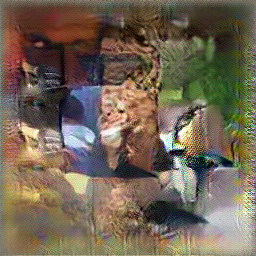

In [16]:
feat = UC_G.sample_vector(device="cuda", )
imgs = UC_G.visualize(feat)
print(imgs.shape)
show_imgrid(imgs)

In [17]:
# refvec = G.sample_vector(1, device="cuda")
refvec = UC_G.sample_vector(device="cuda",)
eigvals_MSE, eigvects_MSE, H_MSE = hessian_compute(UC_G, refvec, MSE, hessian_method="BP", symmetrize=True) # 28 sec

 [================================================================>]  Step: 3ms | Tot: 14s725ms | full hessian columns: 4095 of 40 4096/4096 
Hessian computed with BP in 28.28 sec


In [18]:
eigvals_MSE

array([-4.19111768e-09, -3.31187677e-09, -2.76819789e-09, ...,
        4.17729793e-03,  6.95429603e-03,  1.41633265e-02], dtype=float32)

In [20]:
np.sum(eigvals_MSE < 1E-8)

3229

In [21]:
eigvals_PS, eigvects_PS, H_PS = hessian_compute(UC_G, refvec, ImDist, hessian_method="BP", symmetrize=True) # 48 sec 
eigvals_SSIM, eigvects_SSIM, H_SSIM = hessian_compute(UC_G, refvec, SSIM_Dist, hessian_method="BP", symmetrize=True) # 4 mins 250.28 sec

 [================================================================>]  Step: 58ms | Tot: 3m58s | full hessian columns: 4095 of 40 4096/4096 
Hessian computed with BP in 250.28 sec


In [22]:
eigvals_PS

array([-1.04664934e-07, -1.02778955e-07, -9.63609068e-08, ...,
        1.79339439e-01,  1.97904035e-01,  2.34657645e-01], dtype=float32)

In [23]:
eigvals_SSIM

array([-1.0068607e-09, -8.9669105e-10, -8.4332458e-10, ...,
        5.2594871e-04,  9.9745044e-04,  2.0903111e-03], dtype=float32)

In [26]:
print(np.sum(eigvals_PS < 1E-7))
print(np.sum(eigvals_SSIM < 1E-7))
print(np.sum(eigvals_MSE < 1E-7))

3088
3584
3387


### Mass compute

In [42]:
!mkdir /n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Hessian/DeePSim_FC6

In [ ]:
savedir = "/n/holylfs06/LABS/kempner_fellow_binxuwang/Users/binxuwang/Projects/GAN_Hessian/DeePSim_FC6"

for rnd in trange(500):
    refvec = UC_G.sample_vector(device="cuda", seed=rnd)
    eigvals_MSE, eigvects_MSE, H_MSE = hessian_compute(UC_G, refvec, MSE, hessian_method="BP", symmetrize=True) # 28 sec
    print("num of small eigvals: ", np.sum(eigvals_MSE < 1E-8))
    pkl.dump({"eigvals_MSE": eigvals_MSE, "eigvects_MSE": eigvects_MSE, "H_MSE": H_MSE, "vector": refvec, "seed": rnd}, 
             open(join(savedir, f"Hessian_MSE_rnd{rnd}.pkl"), "wb"))